In [1]:
from utils.load_data import gift_data_to_df
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### All Results

In [1]:
import pandas as pd
import json

In [3]:
gift_df = pd.read_csv("results/all_results.csv")

with open("results/data/domain_dict.json", "r") as f:
    domain_data = json.load(f)

gift_df["Dataset"] = gift_df["dataset, frequency, term"].apply(
    lambda x: x.split(", ")[0] if len(x.split(", ")) > 0 else "Unknown")
gift_df["Domain"] = gift_df["Dataset"].apply(lambda x: domain_data[x] if x in domain_data else "Unknown")
gift_df["Term"] = gift_df["dataset, frequency, term"].apply(
    lambda x: x.split(", ")[2] if len(x.split(", ")) > 2 else "Unknown")
gift_df["Frequency"] = gift_df["dataset, frequency, term"].apply(
    lambda x: x.split(", ")[1] if len(x.split(", ")) > 1 else "Unknown")

gift_df = gift_df[["Dataset", "Domain", "Term", "Frequency", "Metric",
    "Chr.B.B", "Chr.B.S", "Chr.B.M", "Chr.B.T", "T.FM1", "T.FM2",
    "Moi.S", "Moi.B", "Moi.L", "Best"]]

gift_df.head(2)

,Dataset,Domain,Term,Frequency,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,bizitobs_application,Web/CloudOps,short,10S,MASE,5.533290,5.406632,7.201342,7.547395,1391.842484,1.560993,4.151204,5.326189,4.035421,T.FM2
1,bizitobs_application,Web/CloudOps,short,10S,Qloss,0.053958,0.034530,0.072335,0.069873,28.269510,0.014470,0.050196,0.029959,0.036407,T.FM2


In [4]:
chronos_df = pd.read_csv("results/chronos_benchmark.csv")

with open("data/chronos_dataset_properties.json") as f:
    dataset_properties_map = json.load(f)

chronos_df["Dataset"] = chronos_df["dataset, term"].apply(
    lambda x: x.split(", ")[0] if len(x.split(", ")) > 0 else "Unknown")
chronos_df["Domain"] = chronos_df["Dataset"].apply(lambda x: dataset_properties_map[x]["domain"]
    if x in dataset_properties_map else "Unknown")
chronos_df["Term"] = chronos_df["dataset, term"].apply(
    lambda x: x.split(", ")[1] if len(x.split(", ")) > 1 else "Unknown")
chronos_df["Frequency"] = chronos_df["Dataset"].apply(lambda x: dataset_properties_map[x]["freq"]
    if x in dataset_properties_map else "Unknown")

chronos_df = chronos_df[["Dataset", "Domain", "Term", "Frequency", "Metric",
    "Chr.B.B", "Chr.B.S", "Chr.B.M", "Chr.B.T", "T.FM1", "T.FM2",
    "Moi.S", "Moi.B", "Moi.L", "Best"]]

chronos_df.head(2)

,Dataset,Domain,Term,Frequency,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,exchange_rate,Econ/Fin,short,D,MASE,1.249064,0.802832,1.105789,1.253411,0.962424,1.254216,1.207863,0.844398,1.668695,Chr.B.S
1,exchange_rate,Econ/Fin,short,D,Qloss,0.004579,0.003843,0.004379,0.004178,0.003686,0.003856,0.004574,0.003251,0.004371,Moi.B


In [6]:
final_df = pd.concat([gift_df, chronos_df])

final_df

,Dataset,Domain,Term,Frequency,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,bizitobs_application,Web/CloudOps,short,10S,MASE,5.533290,5.406632,7.201342,7.547395,1391.842484,1.560993,4.151204,5.326189,4.035421,T.FM2
1,bizitobs_application,Web/CloudOps,short,10S,Qloss,0.053958,0.034530,0.072335,0.069873,28.269510,0.014470,0.050196,0.029959,0.036407,T.FM2
2,bizitobs_application,Web/CloudOps,short,10S,Rank,9.000000,6.500000,11.000000,11.500000,13.500000,1.500000,5.500000,5.000000,4.000000,T.FM2
3,bizitobs_application,Web/CloudOps,medium,10S,MASE,9.720338,9.146529,10.972406,11.416669,1199.144679,3.070241,8.223821,13.003425,11.334245,T.FM2
4,bizitobs_application,Web/CloudOps,medium,10S,Qloss,0.103502,0.084756,0.128187,0.115304,30.441737,0.032932,0.096943,0.076633,0.130132,T.FM2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,dominick,Sales,medium,W,Qloss,0.404659,0.405073,0.403117,0.404093,0.502739,0.452064,0.393818,0.380595,0.379057,Moi.L
23,dominick,Sales,medium,W,Rank,7.000000,10.500000,7.000000,8.500000,13.500000,12.000000,4.500000,3.000000,1.500000,Moi.L
24,dominick,Sales,long,W,MASE,1.304809,1.312013,1.302661,1.305873,1.860555,1.581300,1.258254,1.213115,1.195160,Moi.L
25,dominick,Sales,long,W,Qloss,0.474195,0.475837,0.473482,0.473132,0.600746,0.555765,0.456051,0.448282,0.446397,Moi.L


In [7]:
domain_results = final_df.groupby(["Domain", "Metric"]).agg({
    "Chr.B.B": "mean",
    "Chr.B.S": "mean",
    "Chr.B.M": "mean",
    "Chr.B.T": "mean",
    "T.FM1": "mean",
    "T.FM2": "mean",
    "Moi.S": "mean",
    "Moi.B": "mean",
    "Moi.L": "mean",
}).reset_index()
domain_results["Best"] = domain_results[["Chr.B.B", "Chr.B.S", "Chr.B.M", "Chr.B.T", "T.FM1", "T.FM2",
    "Moi.S", "Moi.B", "Moi.L",]].idxmin(axis=1)

domain_results

,Domain,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,Econ/Fin,MASE,7.159450,6.519241,6.423222,6.738831,6.943480,7.184730,7.851576,6.612666,12.167586,Chr.B.M
1,Econ/Fin,Qloss,0.016534,0.014330,0.013072,0.014493,0.017353,0.016968,0.017533,0.016183,0.038462,Chr.B.M
2,Econ/Fin,Rank,9.333333,4.000000,3.833333,6.333333,6.000000,9.333333,10.666667,5.000000,13.000000,Chr.B.M
3,Energy,MASE,1.018797,1.037001,1.037365,1.069383,1017.487243,1.124241,1.431154,1.304349,1.304425,Chr.B.B
4,Energy,Qloss,0.277429,0.279873,0.280935,0.284422,454.643534,0.335786,0.419536,0.387275,0.381145,Chr.B.B
5,Energy,Rank,4.818182,5.545455,4.727273,5.727273,13.318182,6.590909,10.681818,8.590909,8.318182,Chr.B.M
6,Sales,MASE,1.029641,1.037098,1.031228,1.035654,1.414487,1.185088,1.030320,0.964464,0.959251,Moi.L
7,Sales,Qloss,0.396968,0.399536,0.398875,0.399514,0.485637,0.444709,0.389833,0.375848,0.375224,Moi.L
8,Sales,Rank,6.500000,9.333333,6.833333,8.666667,13.500000,11.666667,6.500000,2.500000,2.000000,Moi.L
9,Weather,MASE,0.704962,0.716802,0.714102,0.742491,191.514484,0.600010,0.807393,0.813602,0.812896,T.FM2


In [9]:
freq_results = final_df.groupby(["Frequency", "Metric"]).agg({
    "Chr.B.B": "mean",
    "Chr.B.S": "mean",
    "Chr.B.M": "mean",
    "Chr.B.T": "mean",
    "T.FM1": "mean",
    "T.FM2": "mean",
    "Moi.S": "mean",
    "Moi.B": "mean",
    "Moi.L": "mean",
}).reset_index()
freq_results["Best"] = freq_results[["Chr.B.B", "Chr.B.S", "Chr.B.M", "Chr.B.T", "T.FM1", "T.FM2",
    "Moi.S", "Moi.B", "Moi.L",]].idxmin(axis=1)

freq_results

,Frequency,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,10S,MASE,6.545707,6.085683,7.824120,8.092802,1354.002554,2.245648,5.380567,7.504966,6.892339,T.FM2
1,10S,Qloss,0.087267,0.069819,0.113045,0.105461,23.794736,0.036572,0.078526,0.070268,0.096611,T.FM2
2,10S,Rank,7.333333,4.916667,10.250000,11.083333,13.500000,1.500000,4.500000,6.916667,7.500000,T.FM2
3,10T,MASE,0.776758,0.811577,0.812932,0.848411,1915.283466,0.717685,1.270875,1.168305,1.195656,T.FM2
4,10T,Qloss,0.257333,0.267990,0.271274,0.284366,837.144209,0.316485,0.473792,0.447082,0.445499,Chr.B.B
5,10T,Rank,3.166667,4.833333,4.333333,6.500000,14.250000,4.500000,10.333333,10.250000,10.083333,Chr.B.B
6,5T,MASE,1.630990,1.659994,1.667854,1.679711,465.558470,1.702864,1.746811,1.670436,1.666152,Chr.B.B
7,5T,Qloss,0.557067,0.598020,0.583437,0.588519,218.377142,0.612698,0.529953,0.512477,0.528030,Moi.B
8,5T,Rank,3.944444,6.055556,6.388889,7.444444,14.833333,8.666667,9.222222,6.277778,6.000000,Chr.B.B
9,D,MASE,4.702253,4.316120,4.256795,4.446693,24.622459,4.753543,5.185391,4.411565,7.765565,Chr.B.M


In [8]:
term_results = final_df.groupby(["Term", "Metric"]).agg({
    "Chr.B.B": "mean",
    "Chr.B.S": "mean",
    "Chr.B.M": "mean",
    "Chr.B.T": "mean",
    "T.FM1": "mean",
    "T.FM2": "mean",
    "Moi.S": "mean",
    "Moi.B": "mean",
    "Moi.L": "mean",
}).reset_index()
term_results["Best"] = term_results[["Chr.B.B", "Chr.B.S", "Chr.B.M", "Chr.B.T", "T.FM1", "T.FM2",
    "Moi.S", "Moi.B", "Moi.L",]].idxmin(axis=1)

term_results

,Term,Metric,Chr.B.B,Chr.B.S,Chr.B.M,Chr.B.T,T.FM1,T.FM2,Moi.S,Moi.B,Moi.L,Best
0,long,MASE,3.039824,2.855412,3.182789,3.298521,852.971118,2.381533,3.044375,3.353725,4.033848,T.FM2
1,long,Qloss,0.330185,0.334687,0.340020,0.351439,328.961042,0.381683,0.371919,0.372935,0.382227,Chr.B.B
2,long,Rank,5.384615,6.038462,6.115385,7.846154,13.269231,6.653846,7.884615,7.653846,7.423077,Chr.B.B
3,medium,MASE,2.792828,2.735281,2.923581,3.004542,643.802261,2.093047,2.948936,3.206678,3.580531,T.FM2
4,medium,Qloss,0.281265,0.306635,0.297648,0.300891,158.246257,0.336084,0.335543,0.337415,0.346542,Chr.B.B
5,medium,Rank,4.923077,6.153846,5.538462,6.884615,14.000000,7.230769,7.653846,7.461538,8.538462,Chr.B.B
6,short,MASE,1.515969,1.471978,1.664418,1.711060,475.617800,1.258546,1.607265,1.588026,1.530802,T.FM2
7,short,Qloss,0.242019,0.230857,0.238469,0.235143,157.865547,0.269526,0.289341,0.269729,0.267946,Chr.B.S
8,short,Rank,4.638889,4.555556,6.083333,6.777778,13.027778,6.833333,10.500000,7.944444,7.861111,Chr.B.S


In [10]:
print(domain_results.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{llrrrrrrrrrl}
\toprule
Domain & Metric & Chr.B.B & Chr.B.S & Chr.B.M & Chr.B.T & T.FM1 & T.FM2 & Moi.S & Moi.B & Moi.L & Best \\
\midrule
Econ/Fin & MASE & 7.159 & 6.519 & 6.423 & 6.739 & 6.943 & 7.185 & 7.852 & 6.613 & 12.168 & Chr.B.M \\
Econ/Fin & Qloss & 0.017 & 0.014 & 0.013 & 0.014 & 0.017 & 0.017 & 0.018 & 0.016 & 0.038 & Chr.B.M \\
Econ/Fin & Rank & 9.333 & 4.000 & 3.833 & 6.333 & 6.000 & 9.333 & 10.667 & 5.000 & 13.000 & Chr.B.M \\
Energy & MASE & 1.019 & 1.037 & 1.037 & 1.069 & 1017.487 & 1.124 & 1.431 & 1.304 & 1.304 & Chr.B.B \\
Energy & Qloss & 0.277 & 0.280 & 0.281 & 0.284 & 454.644 & 0.336 & 0.420 & 0.387 & 0.381 & Chr.B.B \\
Energy & Rank & 4.818 & 5.545 & 4.727 & 5.727 & 13.318 & 6.591 & 10.682 & 8.591 & 8.318 & Chr.B.M \\
Sales & MASE & 1.030 & 1.037 & 1.031 & 1.036 & 1.414 & 1.185 & 1.030 & 0.964 & 0.959 & Moi.L \\
Sales & Qloss & 0.397 & 0.400 & 0.399 & 0.400 & 0.486 & 0.445 & 0.390 & 0.376 & 0.375 & Moi.L \\
Sales & Rank & 6.500 & 9.333 & 6.833 & 8.

In [11]:
print(freq_results.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{llrrrrrrrrrl}
\toprule
Frequency & Metric & Chr.B.B & Chr.B.S & Chr.B.M & Chr.B.T & T.FM1 & T.FM2 & Moi.S & Moi.B & Moi.L & Best \\
\midrule
10S & MASE & 6.546 & 6.086 & 7.824 & 8.093 & 1354.003 & 2.246 & 5.381 & 7.505 & 6.892 & T.FM2 \\
10S & Qloss & 0.087 & 0.070 & 0.113 & 0.105 & 23.795 & 0.037 & 0.079 & 0.070 & 0.097 & T.FM2 \\
10S & Rank & 7.333 & 4.917 & 10.250 & 11.083 & 13.500 & 1.500 & 4.500 & 6.917 & 7.500 & T.FM2 \\
10T & MASE & 0.777 & 0.812 & 0.813 & 0.848 & 1915.283 & 0.718 & 1.271 & 1.168 & 1.196 & T.FM2 \\
10T & Qloss & 0.257 & 0.268 & 0.271 & 0.284 & 837.144 & 0.316 & 0.474 & 0.447 & 0.445 & Chr.B.B \\
10T & Rank & 3.167 & 4.833 & 4.333 & 6.500 & 14.250 & 4.500 & 10.333 & 10.250 & 10.083 & Chr.B.B \\
5T & MASE & 1.631 & 1.660 & 1.668 & 1.680 & 465.558 & 1.703 & 1.747 & 1.670 & 1.666 & Chr.B.B \\
5T & Qloss & 0.557 & 0.598 & 0.583 & 0.589 & 218.377 & 0.613 & 0.530 & 0.512 & 0.528 & Moi.B \\
5T & Rank & 3.944 & 6.056 & 6.389 & 7.444 & 14.833 & 8.667 & 9.2

In [12]:
print(term_results.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{llrrrrrrrrrl}
\toprule
Term & Metric & Chr.B.B & Chr.B.S & Chr.B.M & Chr.B.T & T.FM1 & T.FM2 & Moi.S & Moi.B & Moi.L & Best \\
\midrule
long & MASE & 3.040 & 2.855 & 3.183 & 3.299 & 852.971 & 2.382 & 3.044 & 3.354 & 4.034 & T.FM2 \\
long & Qloss & 0.330 & 0.335 & 0.340 & 0.351 & 328.961 & 0.382 & 0.372 & 0.373 & 0.382 & Chr.B.B \\
long & Rank & 5.385 & 6.038 & 6.115 & 7.846 & 13.269 & 6.654 & 7.885 & 7.654 & 7.423 & Chr.B.B \\
medium & MASE & 2.793 & 2.735 & 2.924 & 3.005 & 643.802 & 2.093 & 2.949 & 3.207 & 3.581 & T.FM2 \\
medium & Qloss & 0.281 & 0.307 & 0.298 & 0.301 & 158.246 & 0.336 & 0.336 & 0.337 & 0.347 & Chr.B.B \\
medium & Rank & 4.923 & 6.154 & 5.538 & 6.885 & 14.000 & 7.231 & 7.654 & 7.462 & 8.538 & Chr.B.B \\
short & MASE & 1.516 & 1.472 & 1.664 & 1.711 & 475.618 & 1.259 & 1.607 & 1.588 & 1.531 & T.FM2 \\
short & Qloss & 0.242 & 0.231 & 0.238 & 0.235 & 157.866 & 0.270 & 0.289 & 0.270 & 0.268 & Chr.B.S \\
short & Rank & 4.639 & 4.556 & 6.083 & 6.778 & 13.028

### GiftEval Benchmark

In [2]:
short_datasets = "solar/10T solar/H solar/D solar/W jena_weather/10T jena_weather/H jena_weather/D " \
"bitbrains_fast_storage/5T bitbrains_fast_storage/H bitbrains_rnd/5T bitbrains_rnd/H bizitobs_application " \
"bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"

med_long_datasets = "solar/10T solar/H jena_weather/10T jena_weather/H " \
"bitbrains_fast_storage/5T bitbrains_rnd/5T bizitobs_application bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"

# Get union of short and med_long datasets
all_datasets = list(set(short_datasets.split() + med_long_datasets.split()))

dataset_properties_map = json.load(open("data/dataset_properties.json"))

In [3]:
len(all_datasets)

15

In [4]:
df = gift_data_to_df("solar/10T")
df

c:\Documenti\VS_Code\tesi\TSFM-ZeroShotEval\src\gift_eval\data.py:149: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = norm_freq_str(to_offset(self.freq).name)
c:\Users\giuli\anaconda3\lib\site-packages\gluonts\dataset\common.py:263: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return pd.Period(val, freq)


,item_id,start,freq,target,set
0,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
1,item_0,2006-12-25 08:00,10T,"[16.45, 8.05, 26.5, 27.25, 17.9, 16.45, 21.15,...",test
2,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
3,item_0,2006-12-25 16:00,10T,"[9.1, 3.95, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",test
4,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
...,...,...,...,...,...
5475,item_136,2006-12-31 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
5476,item_136,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
5477,item_136,2006-12-31 08:00,10T,"[9.05, 9.05, 11.0, 14.2, 15.9, 15.65, 18.5, 21...",test
5478,item_136,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test


In [5]:
df["target"][0].shape

(51600,)

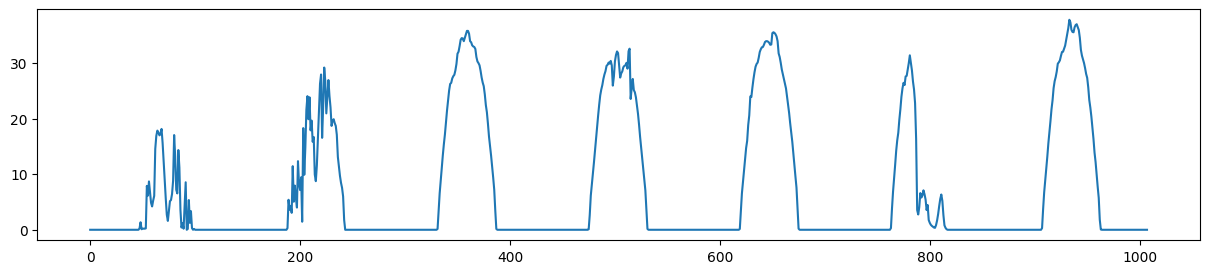

In [6]:
plt.figure(figsize=(15,3))
plt.plot(df["target"][5000][:6*24*7]);

In [7]:
dfH = gift_data_to_df("solar/H")

c:\Documenti\VS_Code\tesi\TSFM-ZeroShotEval\src\gift_eval\data.py:149: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = norm_freq_str(to_offset(self.freq).name)
c:\Users\giuli\anaconda3\lib\site-packages\gluonts\dataset\common.py:263: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.Period(val, freq)


In [9]:
dfH

,item_id,start,freq,target,set
0,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
1,item_0,2006-11-24 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8, 145.25, 21...",test
2,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
3,item_0,2006-11-26 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 136.45, 21...",test
4,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
...,...,...,...,...,...
5201,item_136,2006-12-26 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95, 29.0...",test
5202,item_136,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.25, 59....",test
5203,item_136,2006-12-28 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.15, 115...",test
5204,item_136,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.25, 59....",test


In [10]:
a = [6*i for i in range(0, 1000)]
dfH["target"][0][:1000] == df["target"][0][a]

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,